In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

In [2]:
def generator_normal(m0, std0, m1, std1, train_size, theta, n_after_theta=1000):
    """
    Generate process: train_size from N(m0, std0), then theta from (m0, std0), then n_after_theta from N(m1, std1)
    """
    train_set = np.random.normal(m0, std0, train_size)
    before_theta = np.random.normal(m0, std0, theta)
    after_theta = np.random.normal(m1, std1, n_after_theta)

    return train_set, np.hstack([before_theta, after_theta])

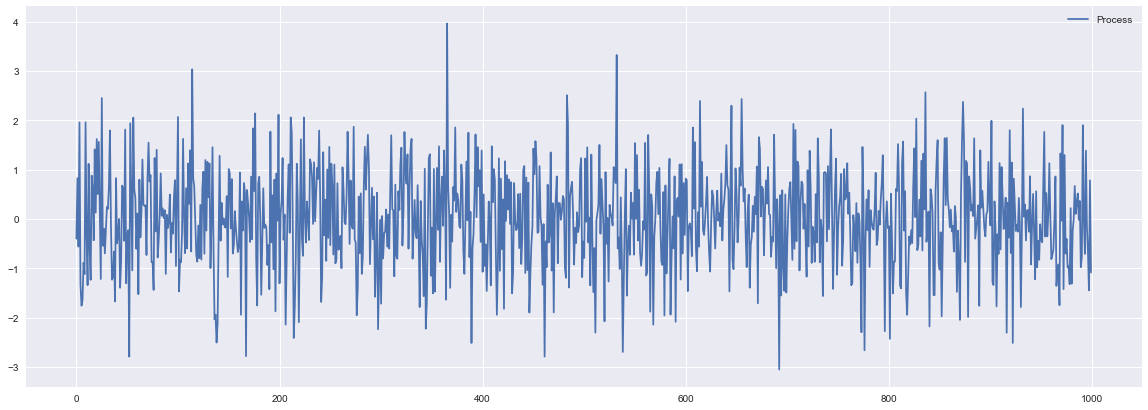

In [9]:
np.random.seed(1)

theta = 500
train = 200

train, proc = generator_normal(0, 1, 0, 1, train, theta, 500)
plt.figure(figsize=(20, 7))
plt.plot(proc)
plt.legend(['Process'])

# SRPT

Статистика выглядит как $Z_n = \log \frac{f_1(x_1, \ldots, x_n)}{f_0(x_1, \ldots, x_n)}$.

Вероятность ошибок 1-го и 2-го рода:

$$
\alpha = P(\text{принять } H_1 |\text{ верна } H_0)
$$$$
\beta = P(\text{принять }H_0 |\text{ верна } H_1)
$$


Последовательный тест отношения
правдоподобия (sequential probability 
ratio test, SPRT) заключается в вычислении
логарифма отношения правдоподобия $Z_n = \log L_n$
(см. выше; в случае независимых наблюдений
формулы упрощаются) и сравнении этой величины
в каждый момент времени с пороговыми
значениями $A < 0, B > 0$, выбранными исходя
из заданных вероятностей ошибок 1 и 2 рода.
Наблюдения останавливаются в первый
момент времени выхода статистики 
$Z_n$ за <<коридор>> $(A, B)$: 

$$
\tau_{A,B} = \inf \{n \geqslant 1: 
Z_n \notin (A, B)\}. 
$$
    
При этом в каждый момент времени принимается
одно из трех решений: 

$$
\begin{cases}
    \text{если } Z_n \leqslant A & \implies
        \text{верна гипотеза } \mathbb{H}_0, \\
    \text{если } Z_n \geqslant B & \implies
        \text{верна гипотеза } \mathbb{H}_1, \\
    \text{если } Z_n \in (A, B) & \implies
        \text{продолжить наблюдения}.
\end{cases}
$$

Обычно полагают 

$$
A = \log \frac{1 - \beta}{\alpha},~B = \log \frac{\beta}{1-\alpha}
$$

Исходная постановка:
* Данные i.i.d.;
* $H_0: x_i \sim f_0 = \mathcal{N}(\mu_0, \sigma_0)$
* $H_1: x_i \sim f_1 = \mathcal{N}(\mu_1, \sigma_1)$


Задача:
* Оценить параметры $\mu_0, \sigma_0$ по данным train. $\mu_1 = 1, \sigma_1 = \sigma_0$
* Построить статистику SRPT. Построить график зависимости среднего времени задержки от вероятности ложной тревоги ($\alpha$)

# Что делать, если мы не знаем параметры в H_1

В таком случае делают 2 вещи:
* Предполагают изменение параметра на какую-то величину $\delta$, полагая $\mu_1 = \mu_0 \pm \delta$;
    * В таком случае строят 2 статистики: положительную и отрицательную. 
    * Гипотеза принимается/отвергается в том случаем, если одна из статистик выйдет за интервал $(A, B)$
* Вводят априорное распределение на $\mu_1$: $\mu_1 \sim \mathcal{N}(1, 1)$

Исходная постановка:
* Данные i.i.d.;
* $H_0: x_i \sim f_0(x) = \mathcal{N}(\mu_0, \sigma_0)$
* $H_1: x_i \sim f_1(x | \mu_1) = \mathcal{N}(\mu_1, \sigma_1)$
* Накладываем ограничение на среднее значение: теперь это тоже случайная величина: $f_1(x | \mu_1) = \mathcal{N}(\mu_1, \sigma_0),~\mu_1 \sim \mathcal{N}(1, 1), \sigma_1 = \sigma_0$


Задача:
* Оценить параметры $\mu_0, \sigma_0$ по данным train. 
* Найти 
$$f_1(x) = \int f_1(x | \mu_1)p(\mu_1)d\mu_1$$
* Построить статистику SRPT. Построить график зависимости среднего времени задержки от вероятности ложной тревоги ($\alpha$)